# Mozambique COVID-19 Data

## Background of COVID-19

This project will analyze the cases and deaths in the country of Mozambique. COVID-19, a form of coronavirus, was first identified in Wuhan, China in December 2019. Mozambique confirmed its first case of COVID-19 in March 2020.

## Data source:

The data is from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide).

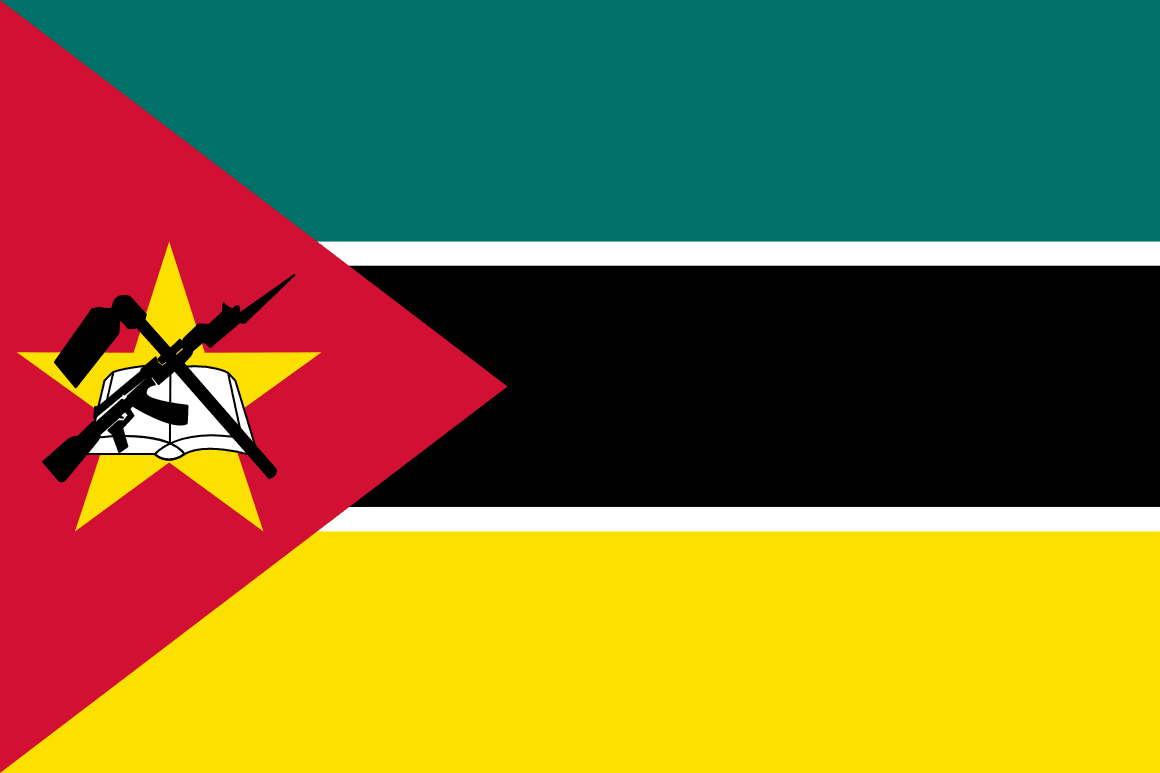

## Import Data from S3 Bucket

In [97]:
%matplotlib inline
import pandas

In [98]:
df=pandas.read_excel('s3://laurasmith-ia241-spring2021/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xls')
mozambique_data = df.loc[df['countriesAndTerritories']=='Mozambique']
mozambique_data[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
39032,2020-12-14,14,12,2020,142,2,Mozambique,MZ,MOZ,30366043.0,Africa,4.416117
39033,2020-12-13,13,12,2020,132,1,Mozambique,MZ,MOZ,30366043.0,Africa,4.037405
39034,2020-12-12,12,12,2020,159,0,Mozambique,MZ,MOZ,30366043.0,Africa,3.866161
39035,2020-12-11,11,12,2020,81,1,Mozambique,MZ,MOZ,30366043.0,Africa,3.470982
39036,2020-12-10,10,12,2020,67,2,Mozambique,MZ,MOZ,30366043.0,Africa,3.747607
39037,2020-12-09,9,12,2020,47,0,Mozambique,MZ,MOZ,30366043.0,Africa,3.760780
39038,2020-12-08,8,12,2020,82,3,Mozambique,MZ,MOZ,30366043.0,Africa,4.007766
39039,2020-12-07,7,12,2020,111,0,Mozambique,MZ,MOZ,30366043.0,Africa,3.974835
39040,2020-12-06,6,12,2020,95,0,Mozambique,MZ,MOZ,30366043.0,Africa,3.793711
39041,2020-12-05,5,12,2020,120,1,Mozambique,MZ,MOZ,30366043.0,Africa,3.823350


# How many cases have been confirmed in Mozambique as of December 2020?

The calculations for this question were made by pulling the sum of the cases from the Mozambique data. I then put them into a sentence using the print command. I then used a line graph to show cases throughout the year.

In [99]:
mozambique_data.sum()['cases']
print ('The total nummber of cases in Mozambique as of December 2020 was {}.'.format (mozambique_data.sum()['cases']))

The total nummber of cases in Mozambique as of December 2020 was 16954.


<AxesSubplot:xlabel='dateRep'>

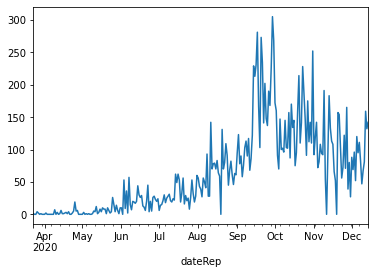

In [100]:
sum_cases_per_day= mozambique_data.groupby('dateRep').sum()['cases']
sum_cases_per_day.plot()

The total number of cases in Mozambique was 16,954. The number of daily cases reached their peak in late September.

# What month had the highest number of deaths from COVID-19 since December?

For this question, I grouped the data by month and then calculated the sum of deaths for each month. After this, I plotted the data on a bar graph.

<AxesSubplot:xlabel='month'>

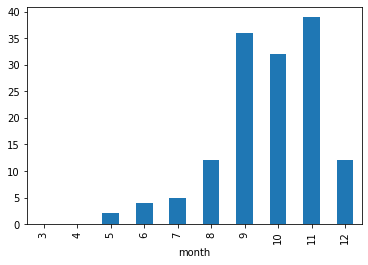

In [101]:
sum_deaths_per_month = mozambique_data.groupby('month').sum()['deaths']
sum_deaths_per_month.plot.bar()

In [102]:
mozambique_data.sum()['deaths']
print ('The total nummber of deaths in Mozambique as of December 2020 was {}.'.format (mozambique_data.sum()['deaths']))

The total nummber of deaths in Mozambique as of December 2020 was 142.


November had the highest number of deaths at 38.

# What month had the highest daily death rate from COVID-19 since December?

For this question, I created a new column called "death rate" to calculate the deaths/the cases for each daily data set. I then grouped the data by month and displayed them on a scatterplot. The data point that shows the highest deeath rate can be seen as an outlier.

In [103]:
df['death_rate']=df['deaths']/df['cases']
df[39032:39041]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate
39032,2020-12-14,14,12,2020,142,2,Mozambique,MZ,MOZ,30366043.0,Africa,4.416117,0.014085
39033,2020-12-13,13,12,2020,132,1,Mozambique,MZ,MOZ,30366043.0,Africa,4.037405,0.007576
39034,2020-12-12,12,12,2020,159,0,Mozambique,MZ,MOZ,30366043.0,Africa,3.866161,0.000000
39035,2020-12-11,11,12,2020,81,1,Mozambique,MZ,MOZ,30366043.0,Africa,3.470982,0.012346
39036,2020-12-10,10,12,2020,67,2,Mozambique,MZ,MOZ,30366043.0,Africa,3.747607,0.029851
39037,2020-12-09,9,12,2020,47,0,Mozambique,MZ,MOZ,30366043.0,Africa,3.760780,0.000000
39038,2020-12-08,8,12,2020,82,3,Mozambique,MZ,MOZ,30366043.0,Africa,4.007766,0.036585
39039,2020-12-07,7,12,2020,111,0,Mozambique,MZ,MOZ,30366043.0,Africa,3.974835,0.000000
39040,2020-12-06,6,12,2020,95,0,Mozambique,MZ,MOZ,30366043.0,Africa,3.793711,0.000000


<AxesSubplot:xlabel='month', ylabel='death_rate'>

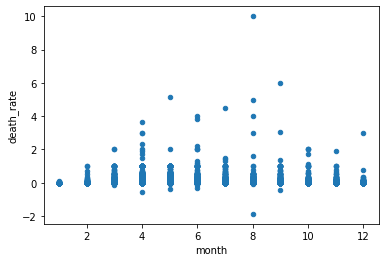

In [104]:
df.plot.scatter(x='month',y='death_rate')

August had the single daily highest death rate.

## Author Information

Author: Laura Smith
<br> Organization: James Madison University 
<br> Email: smith7lc@dukes.jmu.edu

## Conclusion and Limitations

The above calculations show an analysis of Mozambique's COVID-19 data from 2020. The data is limited in that it is several months old and has some inconsistency due to poor data collection, especially earlier in the dataset.

NOTE: The death count data cannot reasonably be displayed on a scatterplot because the daily numbers are low 